<a href="https://colab.research.google.com/github/GuilhermePiresOliveira/Previsao-de-Desempenho-Academico/blob/main/Regress%C3%A3o_linear_p_desenvolvimento_acad%C3%AAmico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Em resumo, Demonstro uma aplicação prática de machine learning na área da educação. A predição da nota de um exame pode ser uma ferramenta útil para personalizar o ensino e melhorar o desempenho dos estudantes.*

## **Importanto todas as Bibliotecas**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# *Pré-processamento de dados*

***Importando o Dataset***

In [96]:
url = "https://raw.githubusercontent.com/GuilhermePiresOliveira/Datasets/refs/heads/main/StudentPerformanceFactors.csv"

***Lendo o dataset***

In [97]:
df = pd.read_csv(url)

***Visualização***

In [98]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


***Traduzindo as colunas***

In [99]:
colunas_traduzidas = {
    'Hours_Studied': 'Horas_Estudadas',
    'Attendance': 'Frequencia',
    'Parental_Involvement': 'Envolvimento_Parental',
    'Access_to_Resources': 'Acesso_a_Recursos',
    'Extracurricular_Activities': 'Atividades_Extracurriculares',
    'Sleep_Hours': 'Horas_de_Sono',
    'Previous_Scores': 'Notas_Anteriores',
    'Motivation_Level': 'Nivel_de_Motivacao',
    'Internet_Access': 'Acesso_a_Internet',
    'Tutoring_Sessions': 'Sessoes_de_Tutoria',
    'Family_Income': 'Renda_Familiar',
    'Teacher_Quality': 'Qualidade_do_Professor',
    'School_Type': 'Tipo_de_Escola',
    'Peer_Influence': 'Influencia_dos_Colegas',
    'Physical_Activity': 'Atividade_Fisica',
    'Learning_Disabilities': 'Deficiencias_de_Aprendizagem',
    'Parental_Education_Level': 'Nivel_de_Educacao_dos_Pais',
    'Distance_from_Home': 'Distancia_de_Casa',
    'Gender': 'Genero',
    'Exam_Score': 'Nota_no_Exame'
}

In [100]:
df_br = df.rename(columns=colunas_traduzidas)

In [101]:
df_br.head()

,Horas_Estudadas,Frequencia,Envolvimento_Parental,Acesso_a_Recursos,Atividades_Extracurriculares,Horas_de_Sono,Notas_Anteriores,Nivel_de_Motivacao,Acesso_a_Internet,Sessoes_de_Tutoria,Renda_Familiar,Qualidade_do_Professor,Tipo_de_Escola,Influencia_dos_Colegas,Atividade_Fisica,Deficiencias_de_Aprendizagem,Nivel_de_Educacao_dos_Pais,Distancia_de_Casa,Genero,Nota_no_Exame
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# *Tratamento de Dados*

***Verificando se existem valores errados ou nulos***

In [102]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Horas_Estudadas               6607 non-null   int64 
 1   Frequencia                    6607 non-null   int64 
 2   Envolvimento_Parental         6607 non-null   object
 3   Acesso_a_Recursos             6607 non-null   object
 4   Atividades_Extracurriculares  6607 non-null   object
 5   Horas_de_Sono                 6607 non-null   int64 
 6   Notas_Anteriores              6607 non-null   int64 
 7   Nivel_de_Motivacao            6607 non-null   object
 8   Acesso_a_Internet             6607 non-null   object
 9   Sessoes_de_Tutoria            6607 non-null   int64 
 10  Renda_Familiar                6607 non-null   object
 11  Qualidade_do_Professor        6529 non-null   object
 12  Tipo_de_Escola                6607 non-null   object
 13  Influencia_dos_Col

*O método .isna() no Pandas é utilizado para identificar valores ausentes (NaN - Not a Number) em um DataFrame.*

In [103]:
df_br.isna().sum() #Contando os valores NULOS em cada coluna

,0
Horas_Estudadas,0
Frequencia,0
Envolvimento_Parental,0
Acesso_a_Recursos,0
Atividades_Extracurriculares,0
Horas_de_Sono,0
Notas_Anteriores,0
Nivel_de_Motivacao,0
Acesso_a_Internet,0
Sessoes_de_Tutoria,0


*O método .nunique() no Pandas é utilizado para contar a quantidade de valores únicos em uma coluna ou linha de um DataFrame.*

In [104]:
  df_br.nunique() #Contando os valores UNICOS em cada coluna

,0
Horas_Estudadas,41
Frequencia,41
Envolvimento_Parental,3
Acesso_a_Recursos,3
Atividades_Extracurriculares,2
Horas_de_Sono,7
Notas_Anteriores,51
Nivel_de_Motivacao,3
Acesso_a_Internet,2
Sessoes_de_Tutoria,9


### ***Preenchendo Valores Nulos com medida estatística moda***

*O método fillna() no Pandas é utilizado para preencher valores ausentes (NaN - Not a Number) em um DataFrame.*

*O método mode() no Pandas é utilizada para encontrar a moda de um DataFrame.*

In [105]:
# Encontrando a moda (valor mais frequente) da qualidade dos professores
moda_qualidade_professor = df_br['Qualidade_do_Professor'].mode()[0]

# Preenchendo os valores ausentes (NaN) na coluna de qualidade dos professores com a moda
df_br['Qualidade_do_Professor'] = df_br['Qualidade_do_Professor'].fillna(moda_qualidade_professor)

# Encontrando a moda do nível de escolaridade dos pais
moda_escolaridade_pais = df_br['Nivel_de_Educacao_dos_Pais'].mode()[0]

# Preenchendo os valores ausentes na coluna de escolaridade dos pais com a moda
df_br['Nivel_de_Educacao_dos_Pais'] = df_br['Nivel_de_Educacao_dos_Pais'].fillna(moda_escolaridade_pais)

# Encontrando a moda da distância da casa até a escola
moda_distancia = df_br['Distancia_de_Casa'].mode()[0]

# Preenchendo os valores ausentes na coluna de distância com a moda
df['Distancia_de_Casa'] = df_br['Distancia_de_Casa'].fillna(moda_distancia)

*Sem valores nulos agora*

In [106]:
df_br.isna().sum()

,0
Horas_Estudadas,0
Frequencia,0
Envolvimento_Parental,0
Acesso_a_Recursos,0
Atividades_Extracurriculares,0
Horas_de_Sono,0
Notas_Anteriores,0
Nivel_de_Motivacao,0
Acesso_a_Internet,0
Sessoes_de_Tutoria,0


In [107]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Horas_Estudadas               6607 non-null   int64 
 1   Frequencia                    6607 non-null   int64 
 2   Envolvimento_Parental         6607 non-null   object
 3   Acesso_a_Recursos             6607 non-null   object
 4   Atividades_Extracurriculares  6607 non-null   object
 5   Horas_de_Sono                 6607 non-null   int64 
 6   Notas_Anteriores              6607 non-null   int64 
 7   Nivel_de_Motivacao            6607 non-null   object
 8   Acesso_a_Internet             6607 non-null   object
 9   Sessoes_de_Tutoria            6607 non-null   int64 
 10  Renda_Familiar                6607 non-null   object
 11  Qualidade_do_Professor        6607 non-null   object
 12  Tipo_de_Escola                6607 non-null   object
 13  Influencia_dos_Col

# *Visualização dos Dados*

*Visualizando atraves de graficos*

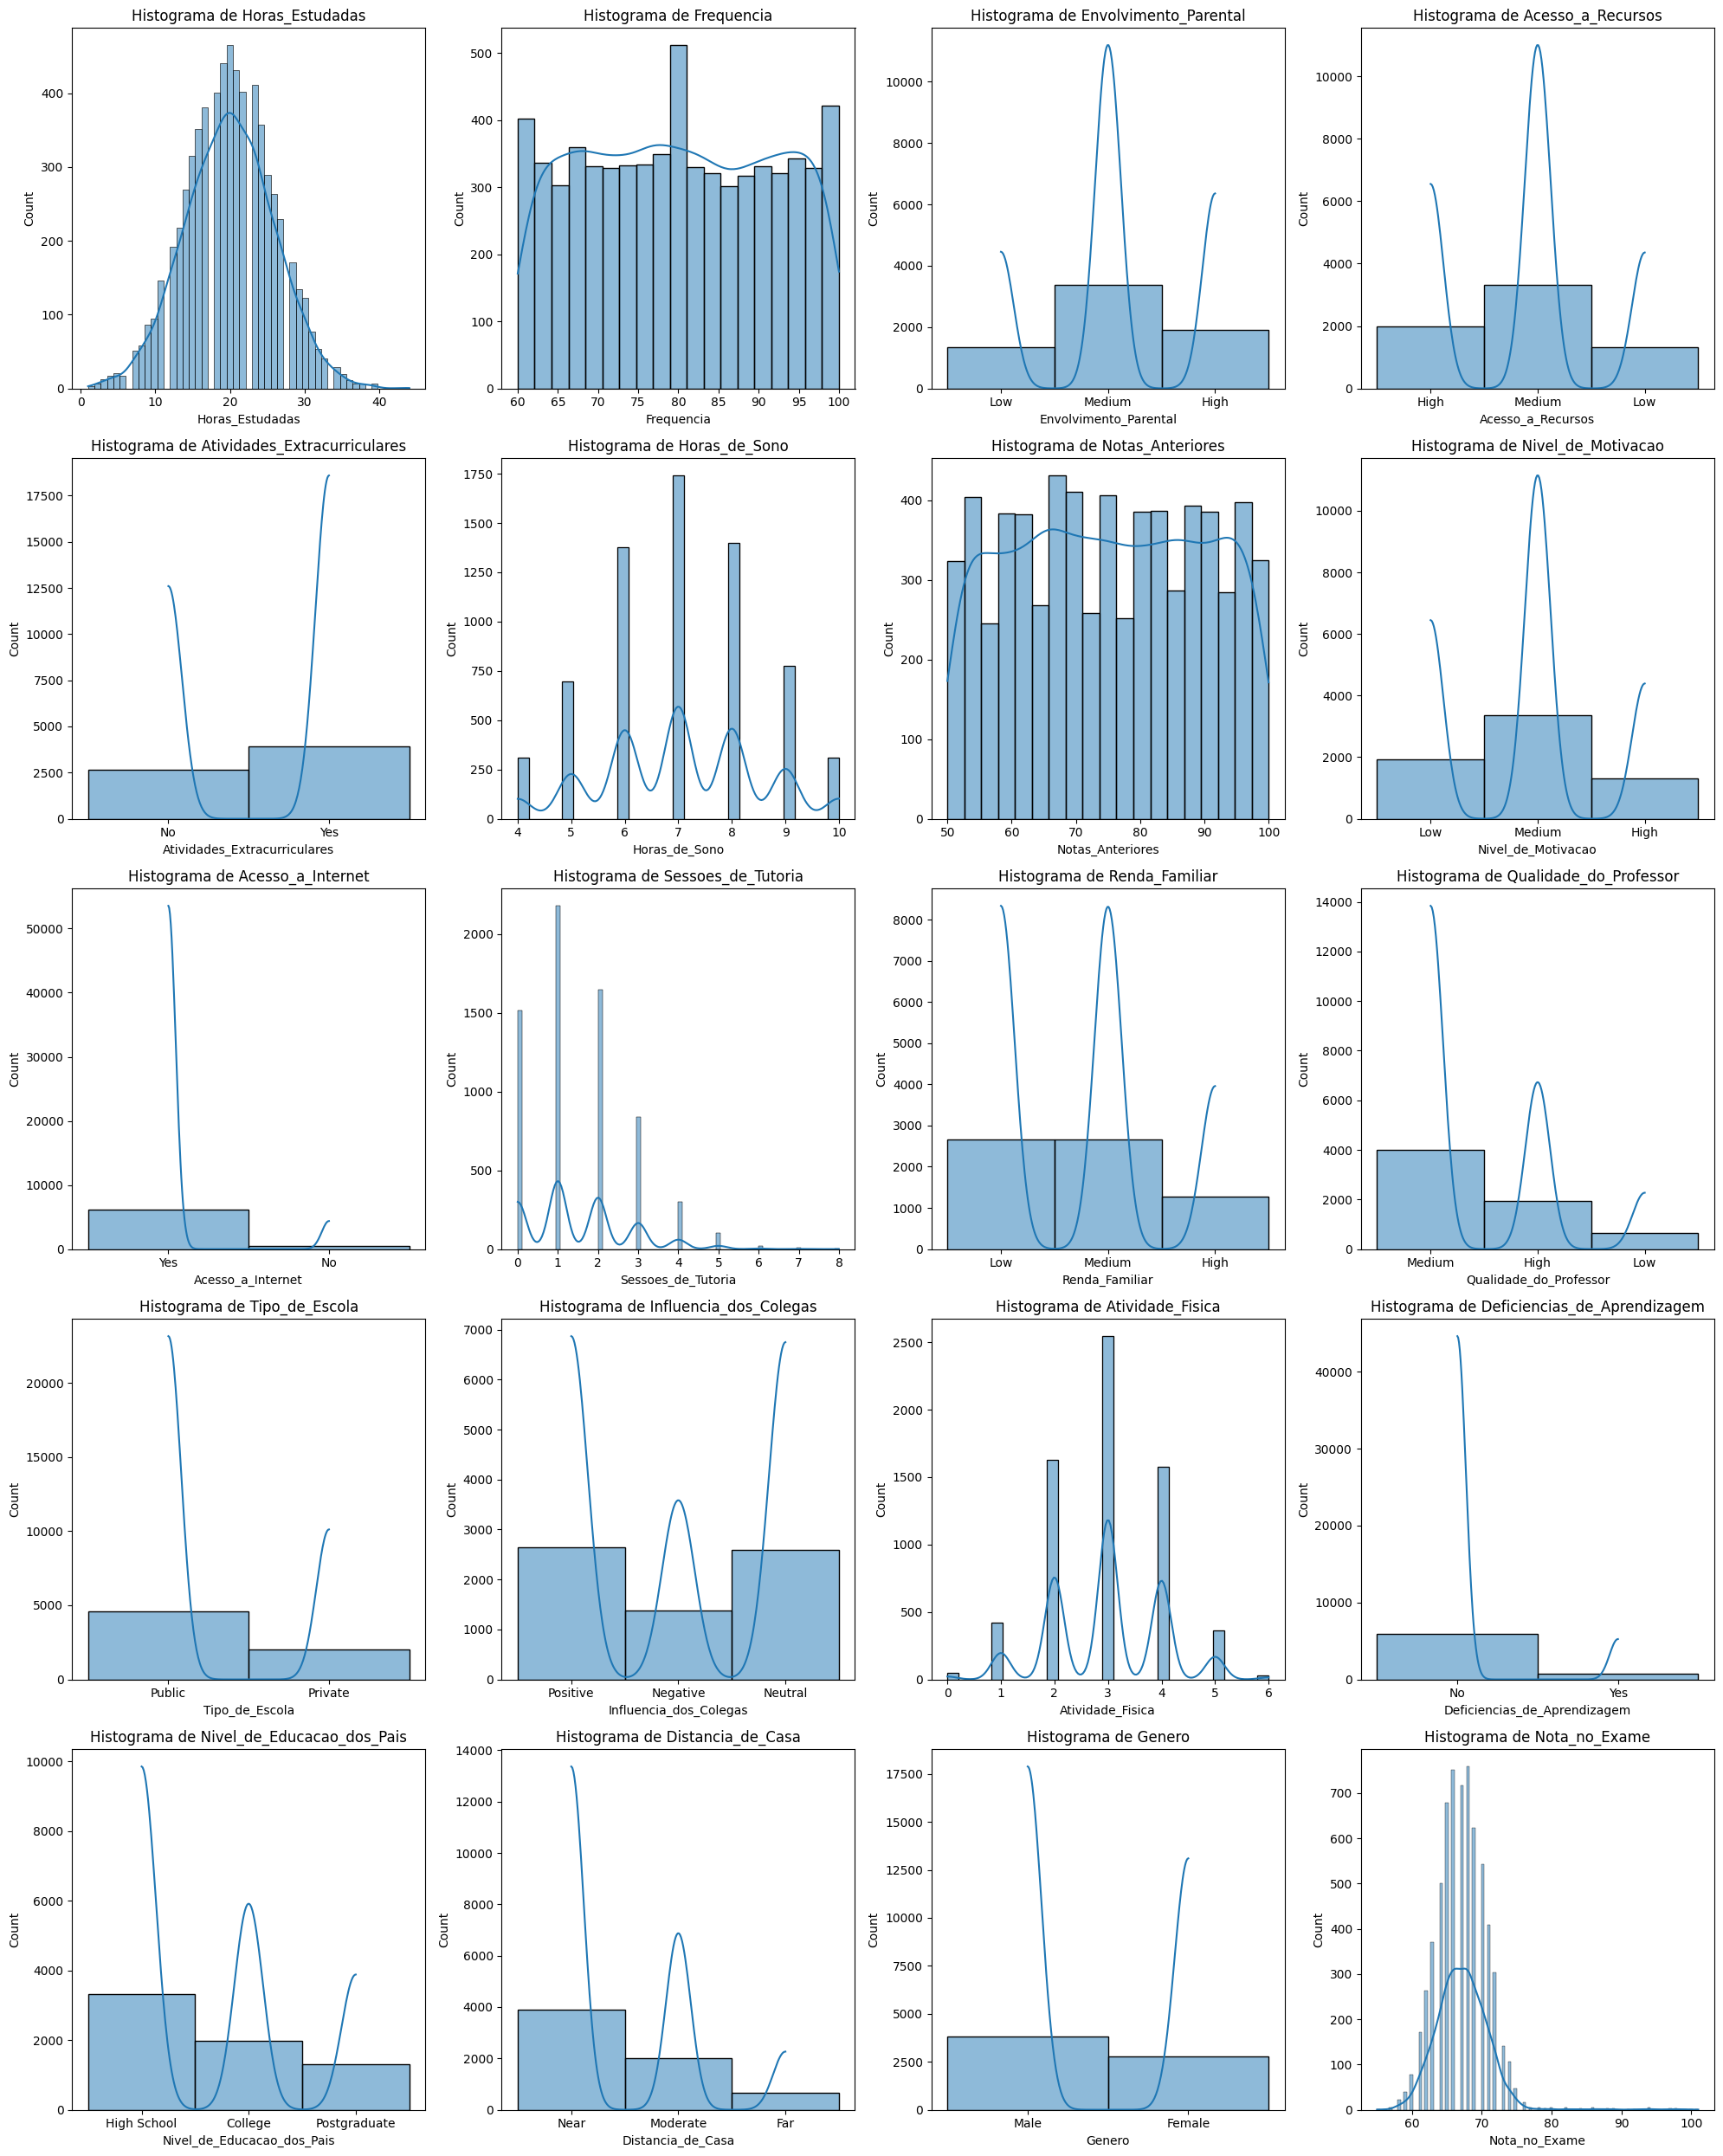

In [108]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(df_br.columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(df_br[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.tight_layout()

plt.show()

*Rotunando as colunas para treino*

In [109]:
columns = [
    'Atividades_Extracurriculares',
    'Acesso_a_Internet',
    'Tipo_de_Escola',
    'Deficiencias_de_Aprendizagem',
    'Genero',
    'Envolvimento_Parental',
    'Acesso_a_Recursos',
    'Nivel_de_Motivacao',
    'Renda_Familiar',
    'Qualidade_do_Professor',
    'Atividade_Fisica',
    'Influencia_dos_Colegas',
    'Nivel_de_Educacao_dos_Pais',
    'Distancia_de_Casa'
]


*O LabelEncoder é uma ferramenta do scikit-learn em Python utilizada para transformar dados categóricos em valores numéricos.*

*Após executar esse código, as características categóricas em df_br serão substituídas por rótulos numéricos.*

In [110]:
label_encoder = LabelEncoder()
for column in columns:
    df_br[column] = label_encoder.fit_transform(df_br[column])

In [111]:
df_br.head()

,Horas_Estudadas,Frequencia,Envolvimento_Parental,Acesso_a_Recursos,Atividades_Extracurriculares,Horas_de_Sono,Notas_Anteriores,Nivel_de_Motivacao,Acesso_a_Internet,Sessoes_de_Tutoria,Renda_Familiar,Qualidade_do_Professor,Tipo_de_Escola,Influencia_dos_Colegas,Atividade_Fisica,Deficiencias_de_Aprendizagem,Nivel_de_Educacao_dos_Pais,Distancia_de_Casa,Genero,Nota_no_Exame
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


# *Treinamento*

In [112]:
X = df_br.drop('Nota_no_Exame', axis=1) #(características) que serão usadas para fazer as previsões
y = df_br['Nota_no_Exame'] #Variável alvo que se deseja prever

*Este código Python, utilizando a função train_test_split da biblioteca scikit-learn, divide o conjunto de dados em dois subconjuntos: um conjunto de treinamento e um conjunto de teste. Essa divisão é essencial para avaliar a performance de um modelo de aprendizado de máquina.*

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

*Esse código normaliza os dados usando o método Min-Max Scaler*

*Após executar esse código, os valores nas colunas de X_train e X_test serão escalados para o intervalo [0, 1]. Isso significa que todos os valores serão transformados em valores entre 0 e 1, independentemente da escala original dos dados.*

In [114]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# *Regressão Linear*

*O código treina um modelo de previsão (regressão linear) usando dados de treinamento e, em seguida, avalia o quão bem ele prevê as notas dos alunos novos usando dados de teste. O erro quadrático médio (MSE) é uma medida de quão precisa a previsão do modelo está.*

In [115]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lr)
print("Erro quadrático médio (MSE):", mse)

Erro quadrático médio (MSE): 4.277231284652525


In [116]:
entrada_personalizada = np.array([
    [10,                 # Horas_Estudo (número)
     90,                 # Frequência (número)
     0,                  # Envolvimento_Parental (já codificado, 0 = baixo)
     1,                  # Acesso_a_Recursos (já codificado, 1 = bom)
     1,                  # Atividades_Extracurriculares (já codificado, 1 = participa)
     6,                  # Horas_de_Sono (número)
     75,                 # Notas_Anteriores (número)
     1,                  # Nível_de_Motivação (já codificado, 1 = alto)
     1,                  # Acesso_à_Internet (já codificado, 1 = tem)
     5,                  # Sessões_de_Tutoria (número)
     2,                  # Renda_Familiar (já codificado, 2 = média)
     1,                  # Qualidade_do_Professor (já codificado, 1 = alta)
     0,                  # Tipo_de_Escola (já codificado, 0 = pública)
     2,                  # Influência_dos_Amigos (já codificado, 2 = forte)
     3,                  # Atividade_Física (número)
     0,                  # Dificuldades_de_Aprendizagem (já codificado, 0 = não tem)
     2,                  # Nível_de_Educação_dos_Pais (já codificado, 2 = universidade)
     1,                  # Distância_de_Casa (já codificado, 1 = perto)
     0                   # Gênero (já codificado, 0 = masculino)
    ]
])

predicao_notas= model_lr.predict(entrada_personalizada)

#Garante que a previsão esteja entre 0 e 100
nota_prevista = max(0, min(100, predicao_notas[0]))

print(f"Nota prevista no exame: {nota_prevista:.2f}")

Nota prevista no exame: 100.00


## **Conclusão:**

***A partir do código, podemos concluir que:***



**Características Relevantes:** As características escolhidas para a predição são consideradas relevantes para o desempenho acadêmico, com base em pesquisas e estudos anteriores.

**Personalização:** O modelo permite fazer predições para estudantes individuais, considerando suas características específicas.

**Interpretação da Saída:** A nota prevista indica a probabilidade do
estudante obter aquela nota no exame, com base nas características fornecidas.

### *Fonte do Dados: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors*